In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

**Step 1 - Data set Creation or Modification** 

In [308]:
dataset_path = '../input/data.csv'
data_df = pd.read_csv(dataset_path)

**Step 2 - Exploratory Data Analysis** 

In [309]:
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [310]:
data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [311]:
data_df.duplicated().sum()

0

**Step 3 - Handling missing value or outliers** 

In [312]:
pd.DataFrame(data_df.isna().sum())

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [313]:
data_df=data_df.set_index('id')
data_df.drop(columns=['Unnamed: 32'],axis=1,inplace=True)

In [314]:
print(data_df.shape)
data_df.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


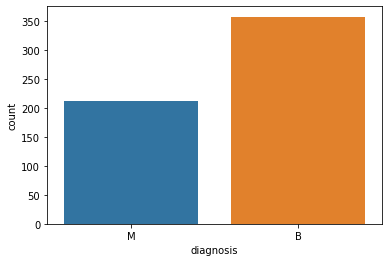

In [315]:
sns.countplot(data_df.diagnosis,label='count')
B, M = data_df.diagnosis.value_counts()

**Step 4 - Feature Engineering- Lable Encoder** 

In [316]:
encoder = LabelEncoder()
data_df.diagnosis = encoder.fit_transform(data_df.diagnosis)

In [317]:
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step - 5:  Normalization / Standardization - Min-max Scalar**

In [318]:
scaler = MinMaxScaler()
scaler.fit(data_df)

MinMaxScaler()

In [319]:
scaler.scale_

array([1.00000000e+00, 4.73283165e-02, 3.38180588e-02, 6.91037247e-03,
       4.24178155e-04, 9.02771509e+00, 3.06729648e+00, 2.34301781e+00,
       4.97017893e+00, 5.05050505e+00, 2.10614996e+01, 3.62122035e-01,
       2.21004243e-01, 4.71186920e-02, 1.86776940e-03, 3.39939491e+01,
       7.51043951e+00, 2.52525253e+00, 1.89429816e+01, 1.40710306e+01,
       3.45480425e+01, 3.55745286e-02, 2.66524520e-02, 4.98032771e-03,
       2.45772709e-04, 6.60371129e+00, 9.70205004e-01, 7.98722045e-01,
       3.43642612e+00, 1.97122019e+00, 6.55909747e+00])

In [320]:
scaled_data = scaler.transform(data_df)
scaled_data

array([[1.        , 0.52103744, 0.0226581 , ..., 0.91202749, 0.59846245,
        0.41886396],
       [1.        , 0.64314449, 0.27257355, ..., 0.63917526, 0.23358959,
        0.22287813],
       [1.        , 0.60149557, 0.3902604 , ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [1.        , 0.45525108, 0.62123774, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [1.        , 0.64456434, 0.66351031, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.        , 0.03686876, 0.50152181, ..., 0.        , 0.25744136,
        0.10068215]])

In [321]:
predicted_scaled_data = scaler.transform(data_df)
predicted_scaled_data

array([[1.        , 0.52103744, 0.0226581 , ..., 0.91202749, 0.59846245,
        0.41886396],
       [1.        , 0.64314449, 0.27257355, ..., 0.63917526, 0.23358959,
        0.22287813],
       [1.        , 0.60149557, 0.3902604 , ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [1.        , 0.45525108, 0.62123774, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [1.        , 0.64456434, 0.66351031, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.        , 0.03686876, 0.50152181, ..., 0.        , 0.25744136,
        0.10068215]])

In [322]:
scaled_data_df = pd.DataFrame(data=scaled_data,columns=data_df.columns)
scaled_data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**Step - 6:  Data spliting and Cross Validation**

In [323]:
X = data_df.drop(columns=['diagnosis'],axis=1).values

In [324]:
y = data_df['diagnosis']

In [325]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Step - 7:  Dimension Reduction - PCA**

In [326]:
pca = PCA()
pca.fit_transform(X)

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03,  1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03,  6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05, -7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05,  4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03, -8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03,  2.42876427e-04,  1.46800350e-03]])

In [327]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

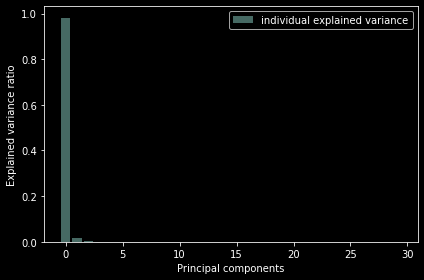

In [328]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Step - 8:  Model - Model Creation and Prediction**

1. Random Forest

In [329]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [330]:
y_pred = rand_clf.predict(X_test)

In [331]:
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9736842105263158


**Step - 9:  Accuracy Measure - Confusion Matrix**

In [332]:
print(confusion_matrix(y_test, y_pred))

[[66  1]
 [ 2 45]]


In [333]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



2. Logistic Regression

In [334]:
 from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [335]:
log_reg.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [336]:
y_pred = log_reg.predict(X_test)

In [337]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9473684210526315


In [338]:
print(confusion_matrix(y_test, y_pred))

[[63  4]
 [ 2 45]]


In [339]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



3. K Neighbors Classifier (KNN)

In [340]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [341]:
y_pred = knn.predict(X_test)

In [342]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9385964912280702


In [343]:
print(confusion_matrix(y_test, y_pred))

[[63  4]
 [ 3 44]]


In [344]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



4. Support Vector Classifier (SVC)

In [345]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [346]:
grid_search.best_params_

{'C': 20, 'gamma': 0.0001}

In [347]:
grid_search.best_score_

0.9428571428571428

In [348]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [349]:
y_pred = svc.predict(X_test)

In [350]:
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.5877192982456141


In [351]:
print(confusion_matrix(y_test, y_pred))

[[66  1]
 [46  1]]


In [352]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74        67
           1       0.50      0.02      0.04        47

    accuracy                           0.59       114
   macro avg       0.54      0.50      0.39       114
weighted avg       0.55      0.59      0.45       114



5. Decision Tree Classifier

In [353]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [354]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [355]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [356]:
y_pred = dtc.predict(X_test)

In [357]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9298245614035088


In [358]:
print(confusion_matrix(y_test, y_pred))

[[63  4]
 [ 4 43]]


In [359]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



**Step - 10:  Accuracy Improvement through Ensemble Model**

Ensemble - Voting

In [360]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=10, gamma=0.01)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=28,
                                                     min_samples_split=8,
                                                     splitter='random'))])

In [361]:
y_pred = vc.predict(X_test)

In [362]:
vc_acc = accuracy_score(y_test, y_pred)
print(vc_acc)

0.9298245614035088


In [363]:
print(confusion_matrix(y_test, y_pred))

[[66  1]
 [ 7 40]]


In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Ensemble - AdaBoost

In [365]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=28,
                                                         min_samples_split=8,
                                                         splitter='random'),
                   n_estimators=180)

In [366]:
y_pred = ada.predict(X_test)

In [367]:
ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)

0.9824561403508771


In [368]:
print(confusion_matrix(y_test, y_pred))

[[67  0]
 [ 2 45]]


In [369]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Ensemble - Gradient Boosting Classifier

In [370]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [371]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [372]:
grid_search_gbc.best_score_

0.9692307692307693

In [373]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 200)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [374]:
y_pred = gbc.predict(X_test)

In [375]:
gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9649122807017544


In [376]:
print(confusion_matrix(y_test, y_pred))

[[66  1]
 [ 3 44]]


In [377]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**Step - 11:  Visualization - Accuracy Across Choosen Models**

In [378]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier','Logistic Regression', 'KNN', 'SVC', 'Decision Tree Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier'],
    'Score': [ran_clf_acc,log_reg_acc, knn_acc, svc_acc, dtc_acc, vc_acc, ada_acc, gbc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Ada Boost Classifier,0.982456
0,Random Forest Classifier,0.973684
7,Gradient Boosting Classifier,0.964912
1,Logistic Regression,0.947368
2,KNN,0.938596
4,Decision Tree Classifier,0.929825
5,Voting Classifier,0.929825
3,SVC,0.587719
